In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jawadali1045/20k-multi-class-crop-disease-images

Dataset URL: https://www.kaggle.com/datasets/jawadali1045/20k-multi-class-crop-disease-images
License(s): CC0-1.0
100% 2.34G/2.34G [01:13<00:00, 35.3MB/s]
100% 2.34G/2.34G [01:13<00:00, 34.3MB/s]


In [ ]:
!ls

20k-multi-class-crop-disease-images.zip  sample_data


In [ ]:
!unzip 20k-multi-class-crop-disease-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Wilt/fus263.jpg   
  inflating: Train/Wilt/fus264.jpg   
  inflating: Train/Wilt/fus265.jpg   
  inflating: Train/Wilt/fus266.jpg   
  inflating: Train/Wilt/fus267.jpg   
  inflating: Train/Wilt/fus268.jpg   
  inflating: Train/Wilt/fus269.jpg   
  inflating: Train/Wilt/fus27.jpg    
  inflating: Train/Wilt/fus270.jpg   
  inflating: Train/Wilt/fus271.jpg   
  inflating: Train/Wilt/fus272.jpg   
  inflating: Train/Wilt/fus273.jpg   
  inflating: Train/Wilt/fus274.jpg   
  inflating: Train/Wilt/fus275.jpg   
  inflating: Train/Wilt/fus276.jpg   
  inflating: Train/Wilt/fus277.jpg   
  inflating: Train/Wilt/fus278.jpg   
  inflating: Train/Wilt/fus279.jpg   
  inflating: Train/Wilt/fus28.jpg    
  inflating: Train/Wilt/fus280.jpg   
  inflating: Train/Wilt/fus281.jpg   
  inflating: Train/Wilt/fus282.jpg   
  inflating: Train/Wilt/fus283.jpg   
  inflating: Train/Wilt/fus284.jpg   
  inflating: Train/Wilt/fus285.jpg   

In [ ]:
!ls

20k-multi-class-crop-disease-images.zip  sample_data  Train  Validation


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
train_dir = '/content/Train'  # Path to your training dataset
val_dir = '/content/Validation'  # Path to your validation dataset

Found 15447 images belonging to 42 classes.
Found 3171 images belonging to 42 classes.


In [ ]:
import numpy as np

def preprocess_image(img):
    if len(img.shape) == 2:
        img = np.stack((img,) * 3, axis=-1)
    if img.shape[-1] == 4:
        img = img[..., :3]
    img = img.astype(np.float32)
    return img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 15447 images belonging to 42 classes.
Found 3171 images belonging to 42 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 188s 386ms/step - accuracy: 0.3315 - loss: 2.5361 - val_accuracy: 0.0467 - val_loss: 4.7074
Epoch 2/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.6250 - loss: 1.6857 - val_accuracy: 0.3333 - val_loss: 3.4231
Epoch 3/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 178s 365ms/step - accuracy: 0.5935 - loss: 1.4815 - val_accuracy: 0.0609 - val_loss: 4.9188
Epoch 4/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.7188 - loss: 1.0590 - val_accuracy: 0.0000e+00 - val_loss: 3.0183
Epoch 5/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 206s 374ms/step - accuracy: 0.6909 - loss: 1.1349 - val_accuracy: 0.0663 - val_loss: 6.0759
Epoch 6/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.8438 - loss: 0.4775 - val_accuracy: 0.0000e+00 - val_loss: 5.3505
Epoch 7/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 179s 367ms/step - accuracy: 0.7506 - loss: 0.8886 - val_accuracy: 0.0612 - val_loss: 6.6310
Epoch 8/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8125 - l

In [ ]:
model.save('bimar_model.h5')

In [ ]:
Diseases = [
    "American Bollworm", "Anthracnose", "Army worm", "Bacterial Blight", "Brownspot", "Common",
    "Aphid", "Flag Smut", "Gray_Leaf_Spot", "Healthy Wheat", "Leaf Curl", "Leaf Smut",
    "Mosaic", "RedRot", "RedRust", "Rice Blast", "Tungro", "Brown leaf rust",
    "Wheat stem fly", "leaf bright", "mite", "scab", "Yellow rust", "Bacterial blight",
    "bollrot", "stem armyworm", "pink ballworm", "red cotton", "thrips",
    "Powdery Mildew", "Downy Mildew", "Verticillium Wilt", "Fusarium Wilt", "Crown Rot",
    "Gummy Stem Blight", "Root Knot Nematode", "Late Blight", "Clubroot", "Ergot",
    "Septoria Leaf Spot", "Angular Leaf Spot", "Sclerotinia Stem Rot"
]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted disease: Bacterial Blight


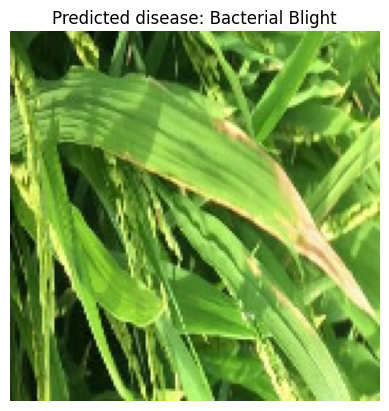

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/content/bimar_model.h5')

# Function to preprocess the image
def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize
    return img, img_array

# Example usage
img_path = '/content/BACTERAILBLIGHT3_003.jpg'
original_image, processed_image = preprocess_image(img_path)

predictions = model.predict(processed_image)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_disease = Diseases[predicted_class_index]
print(f'Predicted disease: {predicted_disease}')

plt.imshow(original_image)
plt.title(f'Predicted disease: {predicted_disease}')
plt.axis('off')
plt.show()

In [ ]:
len(Diseases)

42

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0
